# SST timeline

https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/ 
https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.linregress.html 
Extension: Can you think of a better way of doing this? Perhaps fitting a better line?

In [17]:
# open HADSST4_timeseries.csv and determine if there's a trend
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import linregress

In [18]:
df = pd.read_csv('HadSST4_timeseries.csv')

In [19]:
df.head()

,year,anomaly,total_uncertainty,uncorrelated_uncertainty,correlated_uncertainty,bias_uncertainty,coverage_uncertainty,lower_bound_95pct_bias_uncertainty_range,upper_bound_95pct_bias_uncertainty_range
0,1850,-0.30950,0.12747,0.00912,0.09255,0.04338,0.07562,-0.40579,-0.23192
1,1851,-0.19337,0.12897,0.00958,0.09721,0.04269,0.07260,-0.28779,-0.11750
2,1852,-0.18339,0.12484,0.01073,0.09169,0.04133,0.07316,-0.27454,-0.10496
3,1853,-0.21098,0.11080,0.00851,0.07829,0.03854,0.06774,-0.29375,-0.14112
4,1854,-0.26843,0.10534,0.00724,0.07324,0.03695,0.06568,-0.34812,-0.20058


In [20]:
year = df['year']
anomaly = df['anomaly']

In [21]:
scipy.stats.linregress(year, anomaly)

LinregressResult(slope=0.004841754164387647, intercept=-9.459063204813283, rvalue=0.802516270257719, pvalue=2.6720630467440723e-39, stderr=0.00027854534839969993)

Text(0.5, 1.0, 'Global SST temperature anomaly')

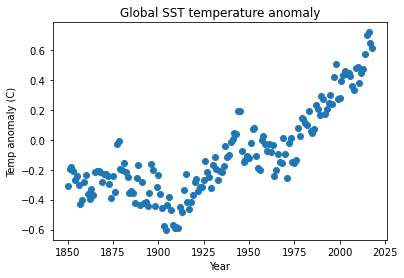

In [22]:
fig = plt.figure()  # Create a figure and an axes
ax1 = fig.add_subplot(1,1,1)
ax1.scatter(year, anomaly)
ax1.set_xlabel('Year')
ax1.set_ylabel('Temp anomaly (C)')
ax1.set_title('Global SST temperature anomaly')

In [23]:
scipy.stats.linregress(year, anomaly)

LinregressResult(slope=0.004841754164387647, intercept=-9.459063204813283, rvalue=0.802516270257719, pvalue=2.6720630467440723e-39, stderr=0.00027854534839969993)

In [24]:
result = _ 

In [25]:
result.rvalue

0.802516270257719

In [26]:
result.rvalue**2

0.6440323640283603

In [27]:
# Test for whether this is statistically significant 

In [28]:
# First plot the regression line 

Text(0.5, 1.0, 'Global SST temperature anomaly')

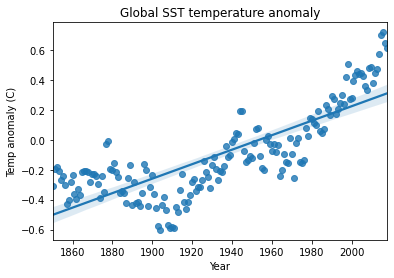

In [29]:
import seaborn as sns
ax2 = sns.regplot(year, anomaly)
ax2.set_xlabel('Year')
ax2.set_ylabel('Temp anomaly (C)')
ax2.set_title('Global SST temperature anomaly')

In [30]:
data2 = pd.concat([year, anomaly], axis=1) # learned to concatenate two series into a df

In [31]:
# need to get year and anomaly (both currenly pd series) into a df
from statsmodels.formula.api import ols
model = ols("anomaly ~ year", data2).fit()

https://scipy-lectures.org/packages/statistics/index.html#linear-models-multiple-factors-and-analysis-of-variance

In [32]:
print(model.summary())  

                            OLS Regression Results                            
Dep. Variable:                anomaly   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     302.1
Date:                Mon, 31 Aug 2020   Prob (F-statistic):           2.67e-39
Time:                        20:49:41   Log-Likelihood:                 54.176
No. Observations:                 169   AIC:                            -104.4
Df Residuals:                     167   BIC:                            -98.09
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -9.4591      0.539    -17.553      0.0

In [33]:
# Not sure how to read this, is it statistically significant? 
# Looks like p values are less than 0.000, so yeah, going to go say this is significant

In [34]:
# Extension - maybe a non-linear line? 
# Polynomial lines could be produced
# https://jakevdp.github.io/PythonDataScienceHandbook/05.06-linear-regression.html#Polynomial-basis-functions
# Also what if there are multiple causal variables, then regressions on each of those